#Use a proper tensorflow version
Our model was build on TF2.14 and it does cause some compatibility issues with TF2.17 so make sure you use the right version

In [1]:
#Check tf version
import tensorflow as tf
#print(tf.__version__)

#The following force you to use tensorflow 2.14 but you need to restart. You may comment it if you know you are using 2.14
##Make sure you down grade!! otherwise, some part will fail due to compatibility.
!pip3 install --upgrade tensorflow==2.14.0
print(tf.__version__)

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 489.8/489.8 MB 787.4 kB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 67.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 99.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 440.7/440.7 kB 31.7 MB/s eta 0:00:00
  Attempting uninstall: tensorflow-estimator
    Found existing installation: tensorflow-estimator 2.15.0
    Uninstalling tensorflow-estimator-2.15.0:
      Successfully uninstalled tensorflow-estimator-2.15.0
  Attempting uninstall: keras
    Found existing installation: keras 2.15.0
    Uninstalling keras-2.15.0:
      Successfully uninstalled keras-2.15.0
  Attempting uninstall: google-auth-oauthlib
    Found existing installation: google-auth-oauthlib 1.2.1
    Uninstalling google-auth-oauthlib-1.2.1:
      Successfully uninstalled google-auth-oauthlib-1.2.1
  Attempting uninstall: tensorboard
    Found existing installation: tensorboard 2.15.2
    Uninstalling tensorbo

2.15.0


In [1]:
# !pip install scipy==1.7.3

#Get the dataset

In [2]:
# mount google drive on your runtime using and authorization code.
# more details here: https://colab.research.google.com/notebooks/io.ipynb
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
#Set directories correctly

In [4]:
import os
# Path to the directory containing the project files (CHANGE THIS PATH TO THE DIRECTORY ON YOUR COMPUTER)
PROJECT_ROOT_DIR = os.getcwd() + '/'

# Path to the directory containing the dataset relative to project file
DATA_DIR = 'drive/MyDrive/Datasets/CS5331_Fall24/GTSRB_Data/'

#path to the directory you want to use for saving models relative to the project file
MODEL_DIR = 'drive/MyDrive/Datasets/CS5331_Fall24/GTSRB_Data/'

In [5]:
# Funciton for loading the dataset
# Code from advml-traffic-sign (https://github.com/inspire-group/advml-traffic-sign)
def load_dataset_GTSRB(n_channel=3, train_file_name=None):
    """
    Load GTSRB data as a (datasize) x (channels) x (height) x (width) numpy
    matrix. Each pixel is rescaled to the range [0,1].
    """

    def load_pickled_data(file, columns):
        """
        Loads pickled training and test data.

        Parameters
        ----------
        file    : string
                          Name of the pickle file.
        columns : list of strings
                          List of columns in pickled data we're interested in.

        Returns
        -------
        A tuple of datasets for given columns.
        """

        with open(file, mode='rb') as f:
            dataset = pickle.load(f)
        return tuple(map(lambda c: dataset[c], columns))

    def preprocess(x, n_channel):
        """
        Preprocess dataset: turn images into grayscale if specified, normalize
        input space to [0,1], reshape array to appropriate shape for NN model
        """

        if n_channel == 3:
            # Scale features to be in [0, 1]
            x = (x / 255.).astype(np.float32)
        else:
            # Convert to grayscale, e.g. single Y channel
            x = 0.299 * x[:, :, :, 0] + 0.587 * x[:, :, :, 1] + \
                0.114 * x[:, :, :, 2]
            # Scale features to be in [0, 1]
            x = (x / 255.).astype(np.float32)
            x = x[:, :, :, np.newaxis]
        return x

    # Load pickle dataset
    if train_file_name is None:
        x_train, y_train = load_pickled_data(
            PROJECT_ROOT_DIR + DATA_DIR + 'train.p', ['features', 'labels'])
    else:
        x_train, y_train = load_pickled_data(
            PROJECT_ROOT_DIR + DATA_DIR + train_file_name, ['features', 'labels'])
    x_val, y_val = load_pickled_data(
        PROJECT_ROOT_DIR + DATA_DIR + 'valid.p', ['features', 'labels'])
    x_test, y_test = load_pickled_data(
        PROJECT_ROOT_DIR + DATA_DIR + 'test.p', ['features', 'labels'])

    # Preprocess loaded data
    x_train = preprocess(x_train, n_channel)
    x_val = preprocess(x_val, n_channel)
    x_test = preprocess(x_test, n_channel)
    return x_train, y_train, x_val, y_val, x_test, y_test

In [6]:
import pickle
import numpy as np
# Load the images and labels. These images are RGB so we have 3 channels
imgs_train, labels_train, imgs_val, labels_val, imgs_test, labels_test = load_dataset_GTSRB(n_channel=3)

#Load the built model from Assignment 1 (Already on blackboard)

In [7]:
## Load the saved the model
from tensorflow.keras.models import load_model



#load our already trained model
# Your earlier directories should change to match this one
#You should be able to load the model once trained. The following line is used for that.
model = load_model(MODEL_DIR +'VGG_best.h5')

#Some constants that you might need
It is not neccessary that you will use all

In [8]:
# Set constants (GTSRB)
NUM_LABELS = 43                             # Number of labels or classes for classification
BATCH_SIZE = 128                            # Size of batch
HEIGHT = 32                                 # Height of input image
WIDTH = 32                                  # Width of input image
N_CHANNEL = 3                               # Number of channels
OUTPUT_DIM = 43                             # Number of output dimension

# Set training hyperparameters
NUM_EPOCH = 50                            # Number of epoch to train
LR = 0.0002                                 # Learning rate
RBW = True #restore best weights
PATIENCE = 5# how many epochs between improvements
sample_size = 100
alpha = 0.001
INPUT_SHAPE = (HEIGHT, WIDTH, N_CHANNEL)  # Input shape of model
IMG_SHAPE = (HEIGHT, WIDTH, N_CHANNEL)

# setting up labels

In [9]:
from tensorflow.keras.utils import to_categorical

#Convert the labels to one-hot encoding (to input to the models)

#Use the following sub-test dataset for your certified training
imgs_sub_test = imgs_test[0:500,:,:,:].copy()
labels_adv = labels_test[0:500].copy()




labels_train_cat = to_categorical(labels_train, NUM_LABELS)
labels_test_cat = to_categorical(labels_test, NUM_LABELS)
labels_val_cat = to_categorical(labels_val, NUM_LABELS)

#for testing adversarial inputs
labels_adv_cat = to_categorical(labels_adv,NUM_LABELS)

print('Labels train shape: {}'.format(labels_train.shape))
print('Labels train catagorical shape: {}\n'.format(labels_train_cat.shape))
print('Labels Adver shape: {}'.format(labels_adv.shape))
print('Labels Adver catagorical shape: {}'.format(labels_adv_cat.shape))

print('Imgs Adver shape: {}'.format(imgs_sub_test.shape))

Labels train shape: (34799,)
Labels train catagorical shape: (34799, 43)

Labels Adver shape: (500,)
Labels Adver catagorical shape: (500, 43)
Imgs Adver shape: (500, 32, 32, 3)


#Install ART if needed

In [10]:
#Install ART
!pip install adversarial-robustness-toolbox

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 17.7 MB/s eta 0:00:00


#Some imports.
You might need more

In [11]:
from art.estimators.classification import TensorFlowV2Classifier
from art.estimators.certification.randomized_smoothing import TensorFlowV2RandomizedSmoothing
import tensorflow as tf
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
!pip install statsmodels

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.8/10.8 MB 86.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 233.9/233.9 kB 18.1 MB/s eta 0:00:00


###Part 1

##Task 1
Our first task with implement randomized smoothing for the VGG model from last time. Your task is to download the model and use Adversarial Robustness Toolbox (ART) to implement randomized smoothing to certify the model. [This notebook](https://github.com/Trusted-AI/adversarial-robustness-toolbox/blob/main/notebooks/output_randomized_smoothing_mnist.ipynb) should be your guide to implementing the task. You will use σ^2=[ 0.25,0.5,1] as Gaussian noise parameter. Once needed, use 100 as the number of samples to estimate the certifiable radius. You will find the standard and certified accuracy for different noises. You will also plot the L2 radius versus certified accuracy.

#Notes:
Training will take time to generate the results. Try it first with only 2 training rounds and then increase to 25. Certification for all the testing will take forever. Thus, whenever you need a testing set, use a subset of the testing samples, not all. We already provided that subset for you in a variable that you must look for.


In [ ]:
#get an ART Classifier
art_classifier = TensorFlowV2Classifier(
    model=model,  # replace `loaded_vgg_model` with your VGG model variable
    nb_classes=NUM_LABELS,
    input_shape=INPUT_SHAPE,
    loss_object=tf.keras.losses.CategoricalCrossentropy(from_logits=False),
)


#Fit it as it is to be used for your VGG16 performance
# Fit the underlying model for VGG16 performance evaluation
art_classifier._model.fit(
    imgs_train, labels_train_cat,
    validation_data=(imgs_val, labels_val_cat),
    epochs=25,
    batch_size=BATCH_SIZE,
    verbose=1
)

Epoch 1/25
272/272 [==============================] - 146s 538ms/step - loss: 0.0033 - accuracy: 0.9992 - val_loss: 0.1020 - val_accuracy: 0.9762
Epoch 2/25
272/272 [==============================] - 146s 538ms/step - loss: 0.0010 - accuracy: 0.9998 - val_loss: 0.0869 - val_accuracy: 0.9782
Epoch 3/25
272/272 [==============================] - 145s 535ms/step - loss: 0.0027 - accuracy: 0.9994 - val_loss: 0.0912 - val_accuracy: 0.9778
Epoch 4/25
272/272 [==============================] - 145s 533ms/step - loss: 0.0050 - accuracy: 0.9988 - val_loss: 0.0838 - val_accuracy: 0.9785
Epoch 5/25
272/272 [==============================] - 145s 534ms/step - loss: 0.0055 - accuracy: 0.9988 - val_loss: 0.0783 - val_accuracy: 0.9794
Epoch 6/25
272/272 [==============================] - 145s 534ms/step - loss: 7.6276e-04 - accuracy: 0.9998 - val_loss: 0.1039 - val_accuracy: 0.9741
Epoch 7/25
272/272 [==============================] - 145s 533ms/step - loss: 0.0043 - accuracy: 0.9987 - val_loss: 0.10

In [ ]:
# Define sigma values for Gaussian noise
sigma_values = [0.25, 0.5, 1.0]

# Build the randomized smoothing models
smoothing_models = {}
for sigma in sigma_values:
    smoother = TensorFlowV2RandomizedSmoothing(
      model=art_classifier.model,
      nb_classes=NUM_LABELS,
      input_shape=INPUT_SHAPE,
      sample_size=100,
      scale=sigma,  # Add scale parameter for Gaussian noise
      loss_object=tf.keras.losses.CategoricalCrossentropy(from_logits=False)
    )
    smoothing_models[sigma] = smoother
    print(f"Randomized smoothing model built for sigma = {sigma}")

Randomized smoothing model built for sigma = 0.25
Randomized smoothing model built for sigma = 0.5
Randomized smoothing model built for sigma = 1.0


In [ ]:
def calculate_certification_accuracy(predictions, radii, labels, radius_threshold):
    # Ensure labels are in class indices format
    true_labels = np.argmax(labels, axis=1) if labels.ndim > 1 else labels

    # Ensure predictions are class indices
    predicted_labels = np.argmax(predictions, axis=1) if predictions.ndim > 1 else predictions

    # Check for matching lengths between arrays
    if len(predicted_labels) != len(radii) or len(predicted_labels) != len(true_labels):
        raise ValueError("Mismatched lengths in predicted_labels, radii, and true_labels arrays.")

    # Calculate correct predictions within the given radius threshold
    correct_and_certified = (predicted_labels == true_labels) & (radii >= radius_threshold)

    # Calculate certification accuracy
    certification_accuracy = np.mean(correct_and_certified)

    return certification_accuracy

In [ ]:
# Define the radius thresholds and sigma values
radius_thresholds = np.linspace(0, 3, num=30)  # Adjust as necessary
sigma_values = [0.25, 0.5, 1.0]

# Store certified accuracies for each sigma
certified_accuracies = {sigma: [] for sigma in sigma_values}

# Ensure labels are in class indices format
true_labels_full = np.argmax(labels_adv_cat, axis=1) if labels_adv_cat.ndim > 1 else labels_adv_cat

# Loop over each sigma value to test the smoother's performance
for sigma in sigma_values:
    print(f"\nTesting performance with σ = {sigma}")

    # Initialize the randomized smoothing model with the current sigma
    smoother = TensorFlowV2RandomizedSmoothing(
        model=art_classifier.model,  # Use model from the ART classifier
        nb_classes=NUM_LABELS,
        input_shape=INPUT_SHAPE,
        scale=np.sqrt(sigma),  # Ensure scale uses the square root of variance
        sample_size=100
    )

    # Certify predictions and radii on the subset of test data
    predictions, radii = smoother.certify(x=imgs_sub_test, batch_size=BATCH_SIZE, n=100)

    # Convert predictions to class indices if necessary
    predicted_labels = predictions if predictions.ndim == 1 else np.argmax(predictions, axis=1)

    # Loop over each radius threshold to calculate certification accuracy
    for radius in radius_thresholds:
        accuracy = calculate_certification_accuracy(predicted_labels, radii, true_labels_full[:len(predicted_labels)], radius)
        certified_accuracies[sigma].append(accuracy)

    print(f"Certified accuracies for σ={sigma}: {certified_accuracies[sigma]}")



Testing performance with σ = 0.25
Certified accuracies for σ=0.25: [0.108, 0.078, 0.058, 0.046, 0.034, 0.018, 0.006, 0.004, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]

Testing performance with σ = 0.5
Certified accuracies for σ=0.5: [0.028, 0.024, 0.016, 0.014, 0.008, 0.006, 0.004, 0.002, 0.002, 0.002, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]

Testing performance with σ = 1.0
Certified accuracies for σ=1.0: [0.044, 0.036, 0.016, 0.012, 0.01, 0.004, 0.002, 0.002, 0.002, 0.002, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]


In [ ]:
# Define the radius threshold for certification
radius_threshold = 0.1

predictions, radii = smoother.certify(x=imgs_sub_test, batch_size=BATCH_SIZE, n=100)

cert_accuracy = calculate_certification_accuracy(predictions, radii, labels_adv_cat, radius_threshold)

print(f"Certification Accuracy with L2 radius >= {radius_threshold}: {cert_accuracy:.4f}")

Certification Accuracy with L2 radius >= 0.1: 0.0380


In [ ]:
import pandas as pd
import numpy as np
from art.estimators.certification.randomized_smoothing import TensorFlowV2RandomizedSmoothing

# Define the Gaussian noise levels
sigma_values = [0.25, 0.5, 1.0]
radius_threshold = 0.1  # Example threshold for certified accuracy
results = []

# Ensure labels are class indices
if labels_adv_cat.ndim > 1:
    true_labels_full = np.argmax(labels_adv_cat, axis=1)
else:
    true_labels_full = labels_adv_cat

# Loop over each sigma value
for sigma in sigma_values:
    print(f"\nTesting performance with σ^2 = {sigma}")

    # Initialize the randomized smoothing model with the current sigma
    smoother = TensorFlowV2RandomizedSmoothing(
        model=art_classifier.model,
        nb_classes=NUM_LABELS,
        input_shape=INPUT_SHAPE,
        sample_size=100,
        scale=np.sqrt(sigma)  # Use `scale` instead of `noise_scale`
    )

    # Compute predictions and radii for a subset of test data
    predictions, radii = smoother.certify(x=imgs_sub_test, batch_size=BATCH_SIZE, n=100)

    # Extract true labels for the subset
    true_labels = true_labels_full[:len(predictions)]

    # Compute standard accuracy
    standard_accuracy = np.mean(predictions == true_labels)

    # Compute coverage rate
    coverage_rate = np.mean(radii >= radius_threshold)

    # Compute certified accuracy
    certified_accuracy = calculate_certification_accuracy(predictions, radii, true_labels, radius_threshold)

    # Append results to the table
    results.append({
        "Model": f"Smoothed σ^2={sigma}",
        "L2 Radius": radius_threshold,
        "Standard accuracy": standard_accuracy,
        "Standard coverage rate": coverage_rate,
        "Certified accuracy": certified_accuracy
    })

# Convert results to DataFrame for easier viewing
table_1 = pd.DataFrame(results)


Testing performance with σ^2 = 0.25

Testing performance with σ^2 = 0.5

Testing performance with σ^2 = 1.0


In [ ]:
# Evaluate the original VGG16 model's accuracy on the subset using the Keras model directly
vgg16_accuracy = art_classifier.model.evaluate(imgs_sub_test, labels_adv_cat[:len(predictions)], batch_size=BATCH_SIZE, verbose=0)
original_standard_accuracy = vgg16_accuracy[1]  # Extract accuracy metric

# Add the original VGG16 model’s accuracy for comparison (without smoothing)
table_1 = pd.concat([pd.DataFrame([{
    "Model": "VGG16 original",
    "L2 Radius": "-",
    "Standard accuracy": original_standard_accuracy,
    "Standard coverage rate": "-",
    "Certified accuracy": "-"
}]), table_1], ignore_index=True)

# Display the completed Table 1
print("\nTable 1: Standard and Certified Accuracies for different models")
print(table_1)


Table 1: Standard and Certified Accuracies for different models
               Model L2 Radius  Standard accuracy Standard coverage rate  \
0     VGG16 original         -              0.968                      -   
1  Smoothed σ^2=0.25       0.1              0.106                  0.102   
2   Smoothed σ^2=0.5       0.1              0.030                   0.04   
3   Smoothed σ^2=1.0       0.1              0.040                  0.286   

  Certified accuracy  
0                  -  
1              0.076  
2              0.022  
3              0.034  


In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Define the range of L2 radii to evaluate
radius_values = np.linspace(0, 3, num=30)
sigma_values = [0.25, 0.5, 1.0]
certified_accuracies = {}

# Loop over each sigma to calculate certified accuracies for each radius
for sigma in sigma_values:
    print(f"\nEvaluating certified accuracy for σ^2 = {sigma}")

    # Initialize randomized smoothing model for the current sigma
    smoother = TensorFlowV2RandomizedSmoothing(
        model=art_classifier.model,
        nb_classes=NUM_LABELS,
        input_shape=INPUT_SHAPE,
        sample_size=100,
        scale=np.sqrt(sigma)
    )

    # Compute predictions and radii for the subset of test data
    predictions, radii = smoother.certify(x=imgs_sub_test, batch_size=BATCH_SIZE, n=100)
    true_labels = np.argmax(labels_adv_cat[:len(predictions)], axis=1)

    # Calculate certified accuracy for each radius value
    certified_accuracies[sigma] = [
        calculate_certification_accuracy(predictions, radii, true_labels, radius) for radius in radius_values
    ]


Evaluating certified accuracy for σ^2 = 0.25

Evaluating certified accuracy for σ^2 = 0.5

Evaluating certified accuracy for σ^2 = 1.0


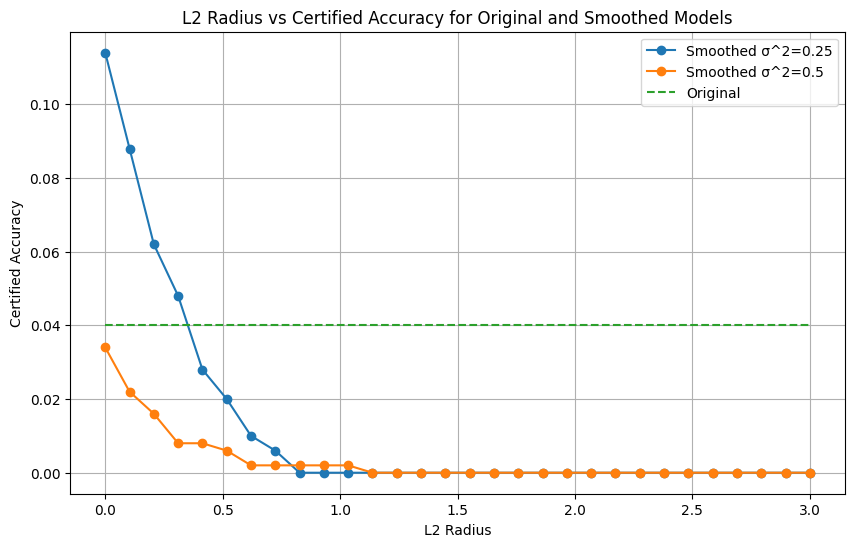

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
sigma_values = [0.25, 0.5]
# Plotting L2 radius vs certified accuracy for each model
plt.figure(figsize=(10, 6))

# Loop through each sigma value and plot certified accuracy vs L2 radius
for sigma in sigma_values:
    plt.plot(radius_values, certified_accuracies[sigma], label=f'Smoothed σ^2={sigma}', marker='o')

# Calculate the standard accuracy for the original model (no smoothing)
if predictions.ndim > 1:
    original_accuracy = np.mean(np.argmax(predictions, axis=-1) == true_labels)
else:
    original_accuracy = np.mean(predictions == true_labels)

# Plot the constant original accuracy line for comparison
plt.plot(radius_values, [original_accuracy] * len(radius_values), label='Original', linestyle='--')

# Add labels, title, and legend
plt.xlabel("L2 Radius")
plt.ylabel("Certified Accuracy")
plt.title("L2 Radius vs Certified Accuracy for Original and Smoothed Models")
plt.legend()
plt.grid(True)
plt.show()

##Part 2


##Task 2

Now, let's do some privacy attacks. We will focus on Membership inference attacks. This task will implement label-only attacks, while the next will implement shadow modeling. As discussed in class, the label-only attack is developed based on the fact that it costs an attacker so much to generate a successful adversarial sample for a member sample. In contrast, the cost will be much less for a non-member sample. Thus, it uses HopSkipJump to generate a successful adversarial sample and then measure the perturbation using the L2 norm. If the perturbation is above a threshold, it will be classified as a member; if not, it will be classified as a non-member. Hence, we will follow the following steps to perform the attack (Your reference code is [this notebook](https://github.com/Trusted-AI/adversarial-robustness-toolbox/blob/main/notebooks/label_only_membership_inference.ipynb)):

1-	Generate a dataset (already given): The training and testing datasets are merged into one, with the training classified as members and the testing as non-members. We picked 1500 samples from this dataset to build our attack model.


2-	Calculate the threshold (to be implemented by you): Your task here is to use existing implementations in ART to calculate/calibrate the threshold. All parameters are given to you in the code (in comments).

3-	Infer the data: Now, use the provided 1500 samples to predict whether they are members. Then, compare your performance to the ground truth and present the results.


One parameter you will need to set is the maximum number of queries (used in step 2). Set this parameter to 5 and 10. All that is needed is to answer the questions below.


##Note on resources:
It takes time to generate the adversarial examples. A good GPU computer will take you around 1-3 hours per round. Thus, plan your time accordingly.


#Generate a dataset

In [13]:
##Some variables to set  number of samples used to calibrate distance threshold
x = np.concatenate([imgs_train, imgs_test]) #Merge train and test dataset
y = np.concatenate([labels_train_cat, labels_test_cat]) #Merge train and test dataset
training_sample = np.array([1] * len(imgs_train) + [0] * len(imgs_test)) #Class label for the attack model training. What does it say?

from numpy.random import choice

##Random samples to be used for training our attack model
# evaluation data
n = 1500
eval_data_idx = choice(len(x), n) #choose 1500 of the samples
x_eval, y_eval = x[eval_data_idx], y[eval_data_idx] #creating your training dataset for the attack model
eval_label = training_sample[eval_data_idx] #creating your training label for the attack model

#Calculate the threshold

In [ ]:
#Start your attack
import tensorflow as tf
import numpy as np
from art.attacks.evasion import HopSkipJump
from art.estimators.classification import TensorFlowV2Classifier

# Define the ART classifier as a black-box using the pre-trained model
classifier_black_box = TensorFlowV2Classifier(
    model=model,
    nb_classes=NUM_LABELS,
    input_shape=INPUT_SHAPE
)

# Initialize the HopSkipJump attack for a black-box setting
hsj_attack = HopSkipJump(
    classifier=classifier_black_box,
    targeted=False,    # Label-only attack is untargeted
    max_iter=2,
    max_eval=100,      # Number of evaluations for initial setup
    init_eval=10       # Initial evaluations for generating adversarial samples
)

print("Label-only membership inference attack started in black-box mode.")

Label-only membership inference attack started in black-box mode.


In [ ]:
# Make sure that you are a black-box
assert classifier_black_box.loss_object is None, "Classifier should not have access to gradients (black-box setting)."

print("Attack confirmed to be in black-box mode, with no access to gradients or internal parameters.")

Attack confirmed to be in black-box mode, with no access to gradients or internal parameters.


In [ ]:
#Initiate your attack variable
#Calibrate
## Use Top-t percentile of 20, Number of sample is 200,  Maximum number of queries is 2, and batch_size is 256
from numpy.linalg import norm
from numpy.random import choice

# Select 200 samples from x_eval for calibration as specified
x_calibration = x_eval[:200]

# Generate adversarial samples using limited queries (max_queries=2)
hsj_attack.max_iter = 2  # Limit number of iterations for calibration

# Generate adversarial samples
x_adv_calibration = hsj_attack.generate(x=x_calibration, batch_size=256)

# Calculate L2 distances between original and adversarial samples
l2_distances = norm((x_adv_calibration - x_calibration).reshape(200, -1), axis=1)

# Set the threshold using the top-20th percentile
calibrated_threshold = np.percentile(l2_distances, 80)  # Top-t (80th percentile) threshold

print(f"Calibration complete. Threshold set at: {calibrated_threshold}")

HopSkipJump:   0%|          | 0/200 [00:00<?, ?it/s]

Calibration complete. Threshold set at: 15.881886672973634


# Infer the data

In [ ]:
##Infer
# Generate adversarial examples for all evaluation samples with max_queries=5 or 10 as needed
def infer_membership(max_queries, threshold):
    # Set max_iter to limit the number of queries per sample
    hsj_attack.max_iter = max_queries

    # Generate adversarial samples
    x_adv = hsj_attack.generate(x=x_eval, batch_size=256)

    # Calculate L2 distances between original and adversarial samples
    l2_distances = norm((x_adv - x_eval).reshape(len(x_eval), -1), axis=1)

    # Classify as member (1) if distance > threshold, else non-member (0)
    inferred_labels = (l2_distances > threshold).astype(int)
    return inferred_labels, l2_distances

# Perform inference for max_queries=5 and max_queries=10
inferred_labels_5, l2_distances_5 = infer_membership(5, calibrated_threshold)
inferred_labels_10, l2_distances_10 = infer_membership(10, calibrated_threshold)

HopSkipJump:   0%|          | 0/1500 [00:00<?, ?it/s]

HopSkipJump:   0%|          | 0/1500 [00:00<?, ?it/s]

In [ ]:
##get results
# Calculate accuracy metrics
def calculate_accuracy(inferred_labels, true_labels):
    member_accuracy = np.mean(inferred_labels[true_labels == 1] == true_labels[true_labels == 1])
    non_member_accuracy = np.mean(inferred_labels[true_labels == 0] == true_labels[true_labels == 0])
    overall_accuracy = np.mean(inferred_labels == true_labels)
    return member_accuracy, non_member_accuracy, overall_accuracy

# Get results for max_queries=5
member_acc_5, non_member_acc_5, overall_acc_5 = calculate_accuracy(inferred_labels_5, eval_label)

# Get results for max_queries=10
member_acc_10, non_member_acc_10, overall_acc_10 = calculate_accuracy(inferred_labels_10, eval_label)

# Display the results in Table 2 format
import pandas as pd

table_2 = pd.DataFrame({
    "Max number of queries": [5, 10],
    "Members accuracy": [member_acc_5, member_acc_10],
    "Non-member accuracy": [non_member_acc_5, non_member_acc_10],
    "Overall accuracy": [overall_acc_5, overall_acc_10]
})

print("\nTable 2: Attack accuracy with different number of queries")
print(table_2)


Table 2: Attack accuracy with different number of queries
   Max number of queries  Members accuracy  Non-member accuracy  \
0                      5          0.027599             0.961259   
1                     10          0.002760             1.000000   

   Overall accuracy  
0          0.284667  
1          0.277333  


##Task 3
Let's do another privacy attack. This time, it is a “shadow models” attack, discussed in class. [This notebook](https://github.com/Trusted-AI/adversarial-robustness-toolbox/blob/main/notebooks/attack_membership_inference_shadow_models.ipynb) will be your guide. You are going to use ART again, and here are a few steps to follow:

1-	Build the shadow models based on the numbers provided below. Set the training ratio for them to 0.5.

2-	Measure the accuracies for them (use validation accuracy as a measure)

3-	Build the attack model. You can build any binary classifier. You are suggested to use a random forest classifier for simplicity.

4-	Evaluate your attack models for members and non-members (the evaluation data is already given to you).

5-	Calculate the precision and recall of your attack model.

Your changing parameter in this task is the number of shadow models. You will set it to 1,2 and 5. Please note the needed metrics so you can plan your code accordingly.

#Note on the implementation:
Our implementation will look strange. Shadow models will require lots and lots of data. Thus, in a general setup, researchers use 80% of the data for shadow models, and only 20% is for training/testing/validation. However, given that we are using a model already built from Assignment 1, we cannot use this general setup. Thus, our shadow models' data will concatenate training and testing while the validation will be left out to test performance accuracy. To evaluate the attack, we generated a separate dataset that is taken from training and testing. You will need to locate and work with that data. In general, your attack results won't be good due to the above design, but the idea is that you should analyze it.


# Data for evaluating the attack.

In [14]:
# Data for evaluating the attack.
n_sample_train = 3000
eval_data_idx=choice(len(imgs_train), n_sample_train)
members_samples, members_labels= imgs_train[eval_data_idx], labels_train_cat[eval_data_idx]
n_sample_train = 3000
eval_data_idx=choice(len(imgs_test), n_sample_train)
non_members_samples, non_members_labels= imgs_test[eval_data_idx], labels_test_cat[eval_data_idx]

#Impliment your attack based on the above steps

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from art.estimators.classification.scikitlearn import ScikitlearnRandomForestClassifier
import numpy as np

# Prepare and flatten the combined data for shadow models
x_combined = np.concatenate([imgs_train, imgs_test])
y_combined = np.argmax(np.concatenate([labels_train_cat, labels_test_cat]), axis=1)
x_combined_flat = x_combined.reshape(x_combined.shape[0], -1)

# Initialize and fit the base RandomForest model before wrapping for ART
rf_base_model = RandomForestClassifier()
rf_base_model.fit(x_combined_flat, y_combined)  # Fit on flattened combined dataset

RandomForestClassifier()

In [ ]:
# Wrap the RandomForest model for ART without `nb_classes`
art_rf_model = ScikitlearnRandomForestClassifier(
    model=rf_base_model,
    clip_values=(0, 1)   # Adjust if data is not normalized to [0, 1]
)

In [ ]:
# Prepare the test data by flattening it to match the model input shape
x_test_flat = imgs_test.reshape(imgs_test.shape[0], -1)
y_test_labels = np.argmax(labels_test_cat, axis=1)

# Test accuracy of the base model
base_model_accuracy = rf_base_model.score(x_test_flat, y_test_labels)
print(f"Base model accuracy: {base_model_accuracy:.4f}")

Base model accuracy: 1.0000


In [ ]:
#Build shadow models
from art.attacks.inference.membership_inference import ShadowModels
from art.utils import to_categorical
from sklearn.model_selection import train_test_split

# Manually set up the shadow model dataset with a 50% split
x_shadow_train, x_shadow_test, y_shadow_train, y_shadow_test = train_test_split(
    x_combined_flat, y_combined, train_size=0.5, random_state=42
)

# Initialize shadow models with the specified ART-wrapped RandomForest model
shadow_models = ShadowModels(
    art_rf_model,    # Use the existing ART-wrapped RandomForest model
    num_shadow_models=5
)

# Generate the shadow dataset for the attack model, ensuring y_shadow is categorical
shadow_dataset = shadow_models.generate_shadow_dataset(x_shadow_train, to_categorical(y_shadow_train, NUM_LABELS))
(member_x, member_y, member_predictions), (nonmember_x, nonmember_y, nonmember_predictions) = shadow_dataset

# Retrieve and print validation accuracies of each shadow model on the test split
shadow_model_accuracies = [sm.model.score(x_shadow_test, y_shadow_test) for sm in shadow_models.get_shadow_models()]
print("Shadow models' validation accuracies:", shadow_model_accuracies)

Shadow models' validation accuracies: [0.938056082648113, 0.9369597301286106, 0.9359898798228969, 0.9387729285262492, 0.9369597301286106]


In [ ]:
#Check thier performance on validation dataset
shadow_validation_accuracies = []

for i, shadow_model in enumerate(shadow_models.get_shadow_models()):
    accuracy = shadow_model.model.score(x_shadow_test, y_shadow_test)
    shadow_validation_accuracies.append(accuracy)
    print(f"Shadow model {i+1} validation accuracy: {accuracy:.4f}")

# Print overall summary of validation accuracies
print("Validation accuracies of shadow models:", shadow_validation_accuracies)

average_accuracy = sum(shadow_validation_accuracies) / len(shadow_validation_accuracies)
print(f"Average validation accuracy for 5 shadow models: {average_accuracy:.4f}")

Shadow model 1 validation accuracy: 0.9381
Shadow model 2 validation accuracy: 0.9370
Shadow model 3 validation accuracy: 0.9360
Shadow model 4 validation accuracy: 0.9388
Shadow model 5 validation accuracy: 0.9370
Validation accuracies of shadow models: [0.938056082648113, 0.9369597301286106, 0.9359898798228969, 0.9387729285262492, 0.9369597301286106]
Average validation accuracy for 5 shadow models: 0.9373


In [ ]:
#Build your attack model and fit it
from art.attacks.inference.membership_inference import MembershipInferenceBlackBox

# Initialize the Membership Inference BlackBox Attack using the ART-wrapped RandomForest model
attack = MembershipInferenceBlackBox(art_rf_model, attack_model_type="rf")

# Fit the attack model with the shadow model member and non-member datasets
attack.fit(member_x, member_y, nonmember_x, nonmember_y, member_predictions, nonmember_predictions)

print("Attack model has been built and fitted.")

Attack model has been built and fitted.


In [ ]:
#Infer on the above data
# Perform inference on the member and non-member data
member_infer = attack.infer(x_shadow_train, y_shadow_train)  # Inference on member samples
nonmember_infer = attack.infer(x_shadow_test, y_shadow_test)  # Inference on non-member samples

print("Inference completed on member and non-member data.")

Inference completed on member and non-member data.


In [ ]:
#Measure your performance
# Calculate accuracy for members and non-members
member_acc = np.sum(member_infer) / len(x_shadow_train)  # Proportion correctly identified as members
nonmember_acc = 1 - np.sum(nonmember_infer) / len(x_shadow_test)  # Proportion correctly identified as non-members
overall_acc = (member_acc * len(x_shadow_train) + nonmember_acc * len(x_shadow_test)) / (len(x_shadow_train) + len(x_shadow_test))

# Display the results
print(f'Attack Member Accuracy: {member_acc:.4f}')
print(f'Attack Non-Member Accuracy: {nonmember_acc:.4f}')
print(f'Overall Attack Accuracy: {overall_acc:.4f}')

Attack Member Accuracy: 0.9513
Attack Non-Member Accuracy: 0.0500
Overall Attack Accuracy: 0.5006


#Here is a code to calculate precision and recall
Make sure it is correct before using it

In [ ]:
def calc_precision_recall(predicted, actual, positive_value=1):
    score = 0  # both predicted and actual are positive
    num_positive_predicted = 0  # predicted positive
    num_positive_actual = 0  # actual positive
    for i in range(len(predicted)):
        if predicted[i] == positive_value:
            num_positive_predicted += 1
        if actual[i] == positive_value:
            num_positive_actual += 1
        if predicted[i] == actual[i]:
            if predicted[i] == positive_value:
                score += 1

    if num_positive_predicted == 0:
        precision = 1
    else:
        precision = score / num_positive_predicted  # the fraction of predicted “Yes” responses that are correct
    if num_positive_actual == 0:
        recall = 1
    else:
        recall = score / num_positive_actual  # the fraction of “Yes” responses that are predicted correctly

    return precision, recall

In [ ]:
# Combine member and non-member inferences and actual values
predicted_labels = np.concatenate((member_infer, nonmember_infer))
actual_labels = np.concatenate((np.ones(len(member_infer)), np.zeros(len(nonmember_infer))))

# Calculate precision and recall
precision, recall = calc_precision_recall(predicted_labels, actual_labels)

# Display precision and recall
print(f'Attack Precision: {precision:.4f}')
print(f'Attack Recall: {recall:.4f}')

Attack Precision: 0.5003
Attack Recall: 0.9513


#Task 4

We will leave the details of implimentation to you

Now, let's defend test defense with DP. We have built a DP-SGD model using the TensorFlow privacy library. The model is given to you, and you just need to analyze it. First, check the overall DP code and answer the below questions. Then, analyze the given DP model in terms of accuracy and resiliency to membership inference attacks. Use a label-only membership inference attack with 5 max-queries and the same setup as in Task 2.


2.	[5 pts] Measure the differential privacy guarantee of the given model.

3.	[5 pts] Calculate the model's performance under attacks and any other observations regarding the results.


In [15]:
# Get the model
from tensorflow.keras.models import model_from_json

# Load the DP model architecture
with open(MODEL_DIR + 'dp_model_architecture.json', 'r') as json_file:
    dp_model_json = json_file.read()
dp_model = model_from_json(dp_model_json)

# Load the DP model weights
dp_model.load_weights(MODEL_DIR + 'dp_model_weights.h5')

In [16]:
!pip install tensorflow-privacy

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 323.2/323.2 kB 954.0 kB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 104.8/104.8 kB 8.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.6/42.6 kB 2.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 76.7 MB/s eta 0:00:00
  Attempting uninstall: tensorflow-probability
    Found existing installation: tensorflow-probability 0.24.0
    Uninstalling tensorflow-probability-0.24.0:
      Successfully uninstalled tensorflow-probability-0.24.0
  Attempting uninstall: packaging
    Found existing installation: packaging 24.1
    Uninstalling packaging-24.1:
      Successfully uninstalled packaging-24.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow-text 2.15.0 requires tensorflow<2.16,>=2.15.0; platform_machine != "arm64" or platform_system != "Darwin", but you ha

In [17]:
#Calculate the differential privacy guarantee
#This may need tensorflow DP to be installed, if you want to use existing libraries.
from tensorflow_privacy.privacy.analysis import compute_dp_sgd_privacy_lib

# Parameters based on the DP-SGD model setup
num_samples = len(imgs_train)
batch_size = 128
noise_multiplier = 1.6
epochs = 14

# Compute epsilon for a given delta
delta = 1e-5
steps = epochs * (num_samples // batch_size)
epsilon = compute_dp_sgd_privacy_lib.compute_dp_sgd_privacy(
    n=num_samples,
    batch_size=batch_size,
    noise_multiplier=noise_multiplier,
    epochs=epochs,
    delta=delta
)[0]

print(f"Differential privacy guarantee (ε) for δ={delta}: {epsilon:.2f}")

Differential privacy guarantee (ε) for δ=1e-05: 0.63


In [ ]:
#Calculate the model's performance under attacks and any other observations regarding the results.
# Step 1: Evaluate baseline accuracy on test data
dp_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
test_accuracy = dp_model.evaluate(imgs_test, labels_test_cat, verbose=0)[1]
print(f"DP Model Test Accuracy: {test_accuracy:.4f}")

DP Model Test Accuracy: 0.5001


In [ ]:
# Step 2: Set up label-only membership inference attack with HopSkipJump
from art.attacks.evasion import HopSkipJump
from art.estimators.classification import TensorFlowV2Classifier
import numpy as np
from numpy.linalg import norm

# Wrap the DP model in an ART classifier
dp_art_classifier = TensorFlowV2Classifier(
    model=dp_model,
    nb_classes=NUM_LABELS,
    input_shape=INPUT_SHAPE
)

# Initialize the HopSkipJump attack
hsj_attack = HopSkipJump(
    classifier=dp_art_classifier,
    targeted=False,
    max_iter=5,
    max_eval=100,
    init_eval=10
)

# Step 3: Run inference for membership
def infer_membership_attack(data, labels, attack, threshold):
    # Generate adversarial samples for inference
    x_adv = attack.generate(x=data, batch_size=256)

    # Calculate L2 distances between original and adversarial samples
    l2_distances = norm((x_adv - data).reshape(len(data), -1), axis=1)

    # Classify as member (1) if distance > threshold, else non-member (0)
    inferred_labels = (l2_distances > threshold).astype(int)
    true_labels = np.argmax(labels, axis=1)  # Convert one-hot to label indices
    return inferred_labels, true_labels

In [ ]:
# Use the subset of 1500 samples for both members and non-members inference
calibrated_threshold = 15.88  # Use the threshold from Task 2 calibration

# Run inference on the evaluation data (1500 samples)
member_preds, true_labels = infer_membership_attack(x_eval, y_eval, hsj_attack, calibrated_threshold)

# Step 4: Calculate accuracy metrics based on the subset
member_accuracy = np.mean(member_preds[eval_label == 1] == eval_label[eval_label == 1])  # Accuracy for member samples
non_member_accuracy = np.mean(member_preds[eval_label == 0] == eval_label[eval_label == 0])  # Accuracy for non-member samples
overall_accuracy = np.mean(member_preds == eval_label)  # Overall accuracy

print(f"Attack Member Accuracy: {member_accuracy:.4f}")
print(f"Attack Non-Member Accuracy: {non_member_accuracy:.4f}")
print(f"Attack Overall Accuracy: {overall_accuracy:.4f}")

HopSkipJump:   0%|          | 0/1500 [00:00<?, ?it/s]

Attack Member Accuracy: 0.0209
Attack Non-Member Accuracy: 0.9548
Attack Overall Accuracy: 0.2687


In [ ]:
# Load the original VGG16 model
original_model = load_model(MODEL_DIR + 'VGG_best.h5')

# Evaluate the overall accuracy on the test set
original_test_accuracy = original_model.evaluate(imgs_test, labels_test_cat, verbose=0)[1]

# Use the subset of 1500 samples for inference
member_preds_original, _ = infer_membership_attack(x_eval, y_eval, hsj_attack, calibrated_threshold)

# Calculate accuracy metrics based on the subset
member_accuracy_original = np.mean(member_preds_original[eval_label == 1] == eval_label[eval_label == 1])  # Members accuracy
non_member_accuracy_original = np.mean(member_preds_original[eval_label == 0] == eval_label[eval_label == 0])  # Non-members accuracy
overall_accuracy_original = np.mean(member_preds_original == eval_label)  # Overall accuracy

# Display results
print("VGG16 (Original) - Accuracy:", original_test_accuracy)
print("VGG16 (Original) - Members Accuracy:", member_accuracy_original)
print("VGG16 (Original) - Non-member Accuracy:", non_member_accuracy_original)
print("VGG16 (Original) - Overall Accuracy:", overall_accuracy_original)

HopSkipJump:   0%|          | 0/1500 [00:00<?, ?it/s]

VGG16 (Original) - Accuracy: 0.9396674633026123
VGG16 (Original) - Members Accuracy: 0.016333938294010888
VGG16 (Original) - Non-member Accuracy: 0.9522613065326633
VGG16 (Original) - Overall Accuracy: 0.26466666666666666
